In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

X_train = pd.read_pickle('./data/X_train_pickle.pkl')
X_test = pd.read_pickle('./data/X_test_pickle.pkl')
y_train = pd.read_pickle('./data/y_train_pickle.pkl')
y_test = pd.read_pickle('./data/y_test_pickle.pkl')

# <span style="color:green">Beginning of KNN GridSearch</span>

#### Adjust the variables to your liking.

In [2]:
neighbors = list(range(1,13))         # Set the range of neighbors we want to test against.
cv=5                                  # Set the number of CrossValidations

### The cell below takes <span style="color:orange">5 minutes</span> to run 
The results will be saved to your disk allowing you to explore futher at a later time without needing to re-run this cell every time.

In [3]:
knn = KNeighborsClassifier()
param_grid = [{'n_neighbors':neighbors}]                  # Set grid search parameters based on variables assigned above.

knn_grid_search = GridSearchCV(knn, param_grid, cv=cv,    # Just passing in the variables assigned above.
                               scoring='f1',              # We want to refit based on better f1 scores.
                               n_jobs=-2,                 # Uses all but one of machine's processors.
                               verbose=50)                # verbose > 0 gives us a progress bar to check on.

knn_grid_search.fit(X_train, y_train)
%store knn_grid_search                                    # This will store the results of the GridSearch

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[Parallel(n_jobs=-2)]: Using backend LokyBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done   1 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-2)]: Done   2 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-2)]: Done   3 tasks      | elapsed:   32.1s
[Parallel(n_jobs=-2)]: Done   4 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-2)]: Done   5 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-2)]: Done   6 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-2)]: Done   7 tasks      | elapsed:   32.8s
[Parallel(n_jobs=-2)]: Done   8 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done   9 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  10 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  11 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  12 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  13 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-2)]: Done  14 tasks      | elapsed:  1.

# <span style="color:orange">Review GridSeach Results.</span>
#### Determine if there are any tunings we want to make before we test our model against the `test set`. 

In [4]:
%store -r knn_grid_search        # restores the results from our previous run of the above cell.
knn_grid_search.best_estimator_  # outputs the best parameters to use based on our GridSearch

no stored variable # restores the results from our previous run of the above cell.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [5]:
# Use cv results to determine next best steps for tuning the model. 
# THEN when we feel that our model is as best as can be, pass in the test.
knn_grid_search.cv_results_ 

{'mean_fit_time': array([7.42890387, 6.53735375, 5.61207995, 5.09013515, 4.3696136 ,
        3.79885969, 3.77890444, 2.81030388, 2.74073009, 2.79099298,
        2.83283501, 2.55773764]),
 'std_fit_time': array([0.26703551, 0.62906791, 0.50190945, 0.41616859, 0.56904426,
        0.80109649, 0.35068593, 0.52419329, 0.39865585, 0.39374935,
        0.23710683, 0.31309722]),
 'mean_score_time': array([23.56473684, 25.00732288, 26.26069431, 27.1290411 , 27.48900776,
        27.43284998, 26.82891345, 26.76296067, 26.37534509, 26.97425737,
        27.6508534 , 19.17236819]),
 'std_score_time': array([0.11727243, 0.8648556 , 0.2710232 , 0.15653306, 0.22498305,
        0.19876049, 0.10282783, 0.10055369, 0.27695767, 0.42006919,
        0.22018418, 4.28591412]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value='?',
        

# <span style="color:red">Final Test Calculation</span>

Now that we're comfortable with the hyper tunings of our parameters, we can finally run our model on our `test set` to truly challenge our model and determine an unbiased result.

In [6]:
y_pred = knn_grid_search.predict(X_test)                # predicting y hat
knn_acc = round(accuracy_score(y_test, y_pred)*100, 3)  # calculating accuracy
knn_f1 = round(knn_grid_search.best_score_*100, 3)      # calculating F1 Score
print("After hyper tuning the KNN model, the best accuracy we could compute was {} with a f1 score of {}".format(knn_acc, knn_f1))

knn = {'accuracy': knn_acc,
       'f1': knn_f1}
%store knn

After hyper tuning the KNN model, the best accuracy we could compute was 84.111 with a f1 score of 62.23
Stored 'knn' (dict)


# Plot Confusion Matrix

>https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

In [7]:
# from sklearn.metrics, we use confusion_matrix and pass in the y_test and y hat; saving the result as cm.
# this will calculate how many true positives, true negatives, false positives, and false negatives there are.
cm = confusion_matrix(y_test,y_pred)

# because we're aiming to predict a value over/under 50K, we set the classes appropriately. 
classes = ['<=50K', '>50K']

In [8]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Greens):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
#         if normalized, convert the confusion matrix to a float, then divide the top quadrants by the summation of the top row
#           and bottom quadrants by the summation of the bottom row to get a percentage for each quadrant.
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

#     Set the plt with the confusion matrix, the colors defined (in this case default)
    plt.imshow(cm, interpolation='nearest', cmap=cmap) # <- What is interpolation?
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes)) 
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

# what is all of this?
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[625  54]
 [ 89 132]]


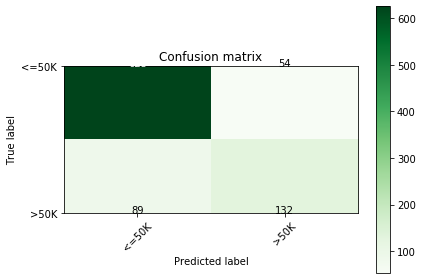

In [9]:
plot_confusion_matrix(cm, classes=classes)

Normalized confusion matrix
[[0.92047128 0.07952872]
 [0.40271493 0.59728507]]


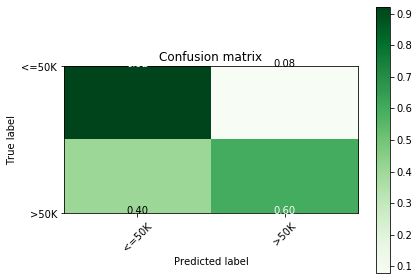

In [10]:
plot_confusion_matrix(cm, classes=classes, normalize=True)